In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling
import fbprophet
import seaborn as sns
plt.style.use('fivethirtyeight')

In [2]:
# Read data
df = pd.read_csv('crime.csv', encoding='iso-8859-1')
offense_codes = pd.read_csv('offense_codes.csv', encoding='iso-8859-1')

In [3]:
# Set DateTime Index
df.columns = [str.lower(col) for col in df.columns]
df['occurred_on_date'] = pd.to_datetime(df.occurred_on_date)
df = df.set_index('occurred_on_date')
#print('Data first entry: {}, last entry: {}'.format(df.index.min(), df.index.max()))
df

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,year,month,day_of_week,hour,ucr_part,street,lat,long,location
occurred_on_date,,,,,,,,,,,,,,,,
2018-09-02 13:00:00,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
2018-08-21 00:00:00,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2018-09-03 19:27:00,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
2018-09-03 21:16:00,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
2018-09-03 21:05:00,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-06-05 17:25:00,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
2015-07-09 13:38:00,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
2015-07-09 13:38:00,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"


## District-level monthly distribution by ucr_part by district

In [4]:
# Subset of main df with respect to ucr_part
partone = df[df.ucr_part == 'Part One']
parttwo = df[df.ucr_part == 'Part Two']
partthree = df[df.ucr_part == 'Part Three']

In [5]:
# List of distinct districts
districts = df.district.unique()
districts

array(['D14', 'C11', 'D4', 'B3', 'B2', 'C6', nan, 'A1', 'E5', 'A7', 'E13',
       'E18', 'A15'], dtype=object)

In [6]:
# Part 1 monthly crime count

partone_D14 = pd.DataFrame(partone[partone.district=='D14'].groupby('month').count()['ucr_part'])
partone_C11 = pd.DataFrame(partone[partone.district=='C11'].groupby('month').count()['ucr_part'])
partone_D4 = pd.DataFrame(partone[partone.district=='D4'].groupby('month').count()['ucr_part'])
partone_B3 = pd.DataFrame(partone[partone.district=='B3'].groupby('month').count()['ucr_part'])
partone_B2 = pd.DataFrame(partone[partone.district=='B2'].groupby('month').count()['ucr_part'])
partone_C6 = pd.DataFrame(partone[partone.district=='C6'].groupby('month').count()['ucr_part'])
partone_A1 = pd.DataFrame(partone[partone.district=='A1'].groupby('month').count()['ucr_part'])
partone_E5 = pd.DataFrame(partone[partone.district=='E5'].groupby('month').count()['ucr_part'])
partone_A7 = pd.DataFrame(partone[partone.district=='A7'].groupby('month').count()['ucr_part'])
partone_E13 = pd.DataFrame(partone[partone.district=='E13'].groupby('month').count()['ucr_part'])
partone_E18 = pd.DataFrame(partone[partone.district=='E18'].groupby('month').count()['ucr_part'])
partone_A15 = pd.DataFrame(partone[partone.district=='A15'].groupby('month').count()['ucr_part'])

frames = [partone_A1, partone_A15, partone_A7, partone_B2, partone_B3, partone_C6, 
          partone_C11, partone_D14, partone_D4, partone_E13, partone_E18, partone_E5]

partone_districts = pd.concat(frames,axis=1)
partone_districts.columns=['A1','A15','A7','B2','B3','C6','C11','D14','D4','E13','E18','E5']
partone_districts

,A1,A15,A7,B2,B3,C6,C11,D14,D4,E13,E18,E5
month,,,,,,,,,,,,
1,643,87,160,661,346,314,524,274,878,271,207,133
2,508,70,144,498,282,272,401,286,803,236,170,114
3,542,101,144,597,311,297,415,252,844,215,163,106
4,537,80,168,611,371,340,492,261,858,230,185,156
5,665,108,182,687,401,347,537,291,948,246,187,140
6,796,144,196,861,515,495,667,379,1171,371,253,177
7,1012,143,262,1046,540,502,808,377,1473,415,322,199
8,1028,132,245,1006,583,531,719,454,1377,390,298,226
9,822,106,207,762,392,359,557,393,1057,317,206,156


/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning:

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.

/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning:

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.

/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning:

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.



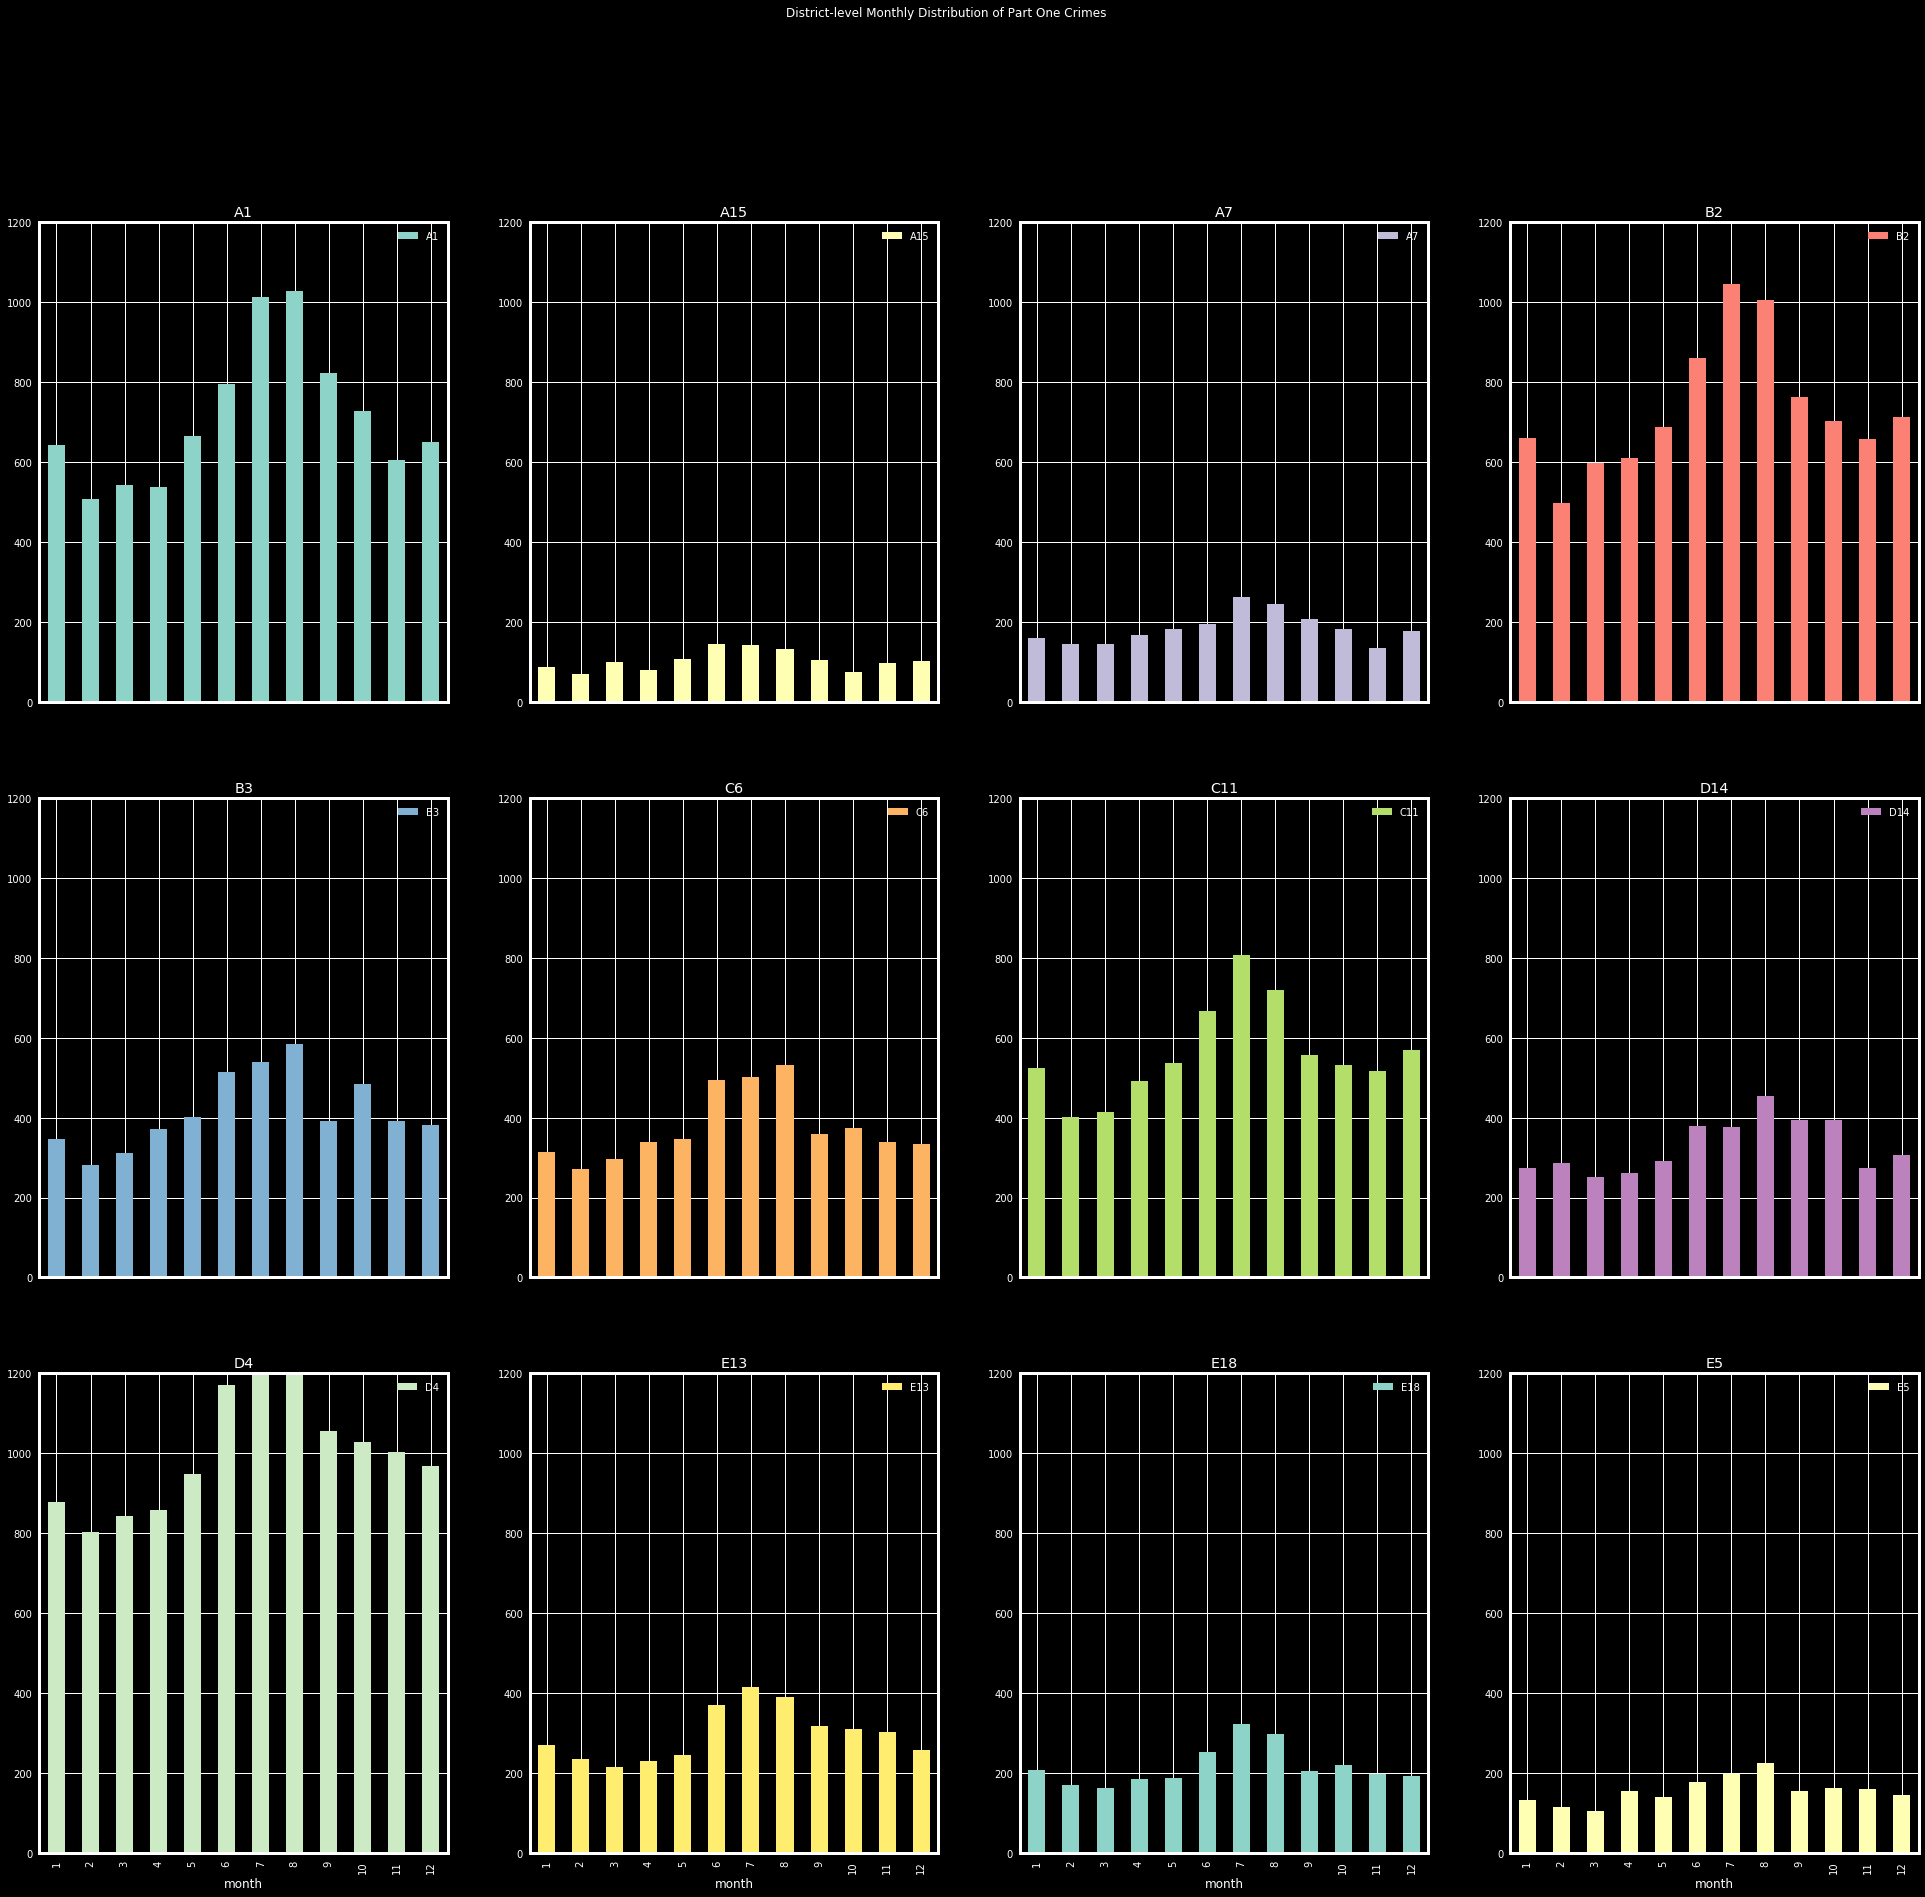

In [7]:
plt.style.use('dark_background')
partone_districts.plot.bar(subplots=True,
                           layout=(3,4), 
                           figsize = (30,30), 
                           ylim=(0,1200),
                           title = 'District-level Monthly Distribution of Part One Crimes')
plt.show()

In [8]:
# Part 2 monthly crime count

parttwo_D14 = pd.DataFrame(parttwo[parttwo.district=='D14'].groupby('month').count()['ucr_part'])
parttwo_C11 = pd.DataFrame(parttwo[parttwo.district=='C11'].groupby('month').count()['ucr_part'])
parttwo_D4 = pd.DataFrame(parttwo[parttwo.district=='D4'].groupby('month').count()['ucr_part'])
parttwo_B3 = pd.DataFrame(parttwo[parttwo.district=='B3'].groupby('month').count()['ucr_part'])
parttwo_B2 = pd.DataFrame(parttwo[parttwo.district=='B2'].groupby('month').count()['ucr_part'])
parttwo_C6 = pd.DataFrame(parttwo[parttwo.district=='C6'].groupby('month').count()['ucr_part'])
parttwo_A1 = pd.DataFrame(parttwo[parttwo.district=='A1'].groupby('month').count()['ucr_part'])
parttwo_E5 = pd.DataFrame(parttwo[parttwo.district=='E5'].groupby('month').count()['ucr_part'])
parttwo_A7 = pd.DataFrame(parttwo[parttwo.district=='A7'].groupby('month').count()['ucr_part'])
parttwo_E13 = pd.DataFrame(parttwo[parttwo.district=='E13'].groupby('month').count()['ucr_part'])
parttwo_E18 = pd.DataFrame(parttwo[parttwo.district=='E18'].groupby('month').count()['ucr_part'])
parttwo_A15 = pd.DataFrame(parttwo[parttwo.district=='A15'].groupby('month').count()['ucr_part'])

frames = [parttwo_A1, parttwo_A15, parttwo_A7, parttwo_B2, parttwo_B3, parttwo_C6, 
          parttwo_C11, parttwo_D14, parttwo_D4, parttwo_E13, parttwo_E18, parttwo_E5]

parttwo_districts = pd.concat(frames,axis=1)
parttwo_districts.columns=['A1','A15','A7','B2','B3','C6','C11','D14','D4','E13','E18','E5']
parttwo_districts

,A1,A15,A7,B2,B3,C6,C11,D14,D4,E13,E18,E5
month,,,,,,,,,,,,
1,821,159,322,1204,800,547,1035,394,883,380,368,328
2,752,116,304,1126,778,504,962,384,840,406,387,276
3,797,129,335,1325,946,653,1042,393,916,410,366,308
4,822,133,346,1274,887,614,1051,398,879,431,424,299
5,939,152,343,1306,952,523,1192,489,968,447,405,307
6,968,181,445,1543,1083,619,1269,501,1161,487,523,378
7,1250,193,465,1683,1185,793,1519,562,1347,587,549,398
8,1302,187,481,1794,1235,851,1381,543,1271,537,545,391
9,900,164,358,1357,866,562,1107,455,970,462,392,347


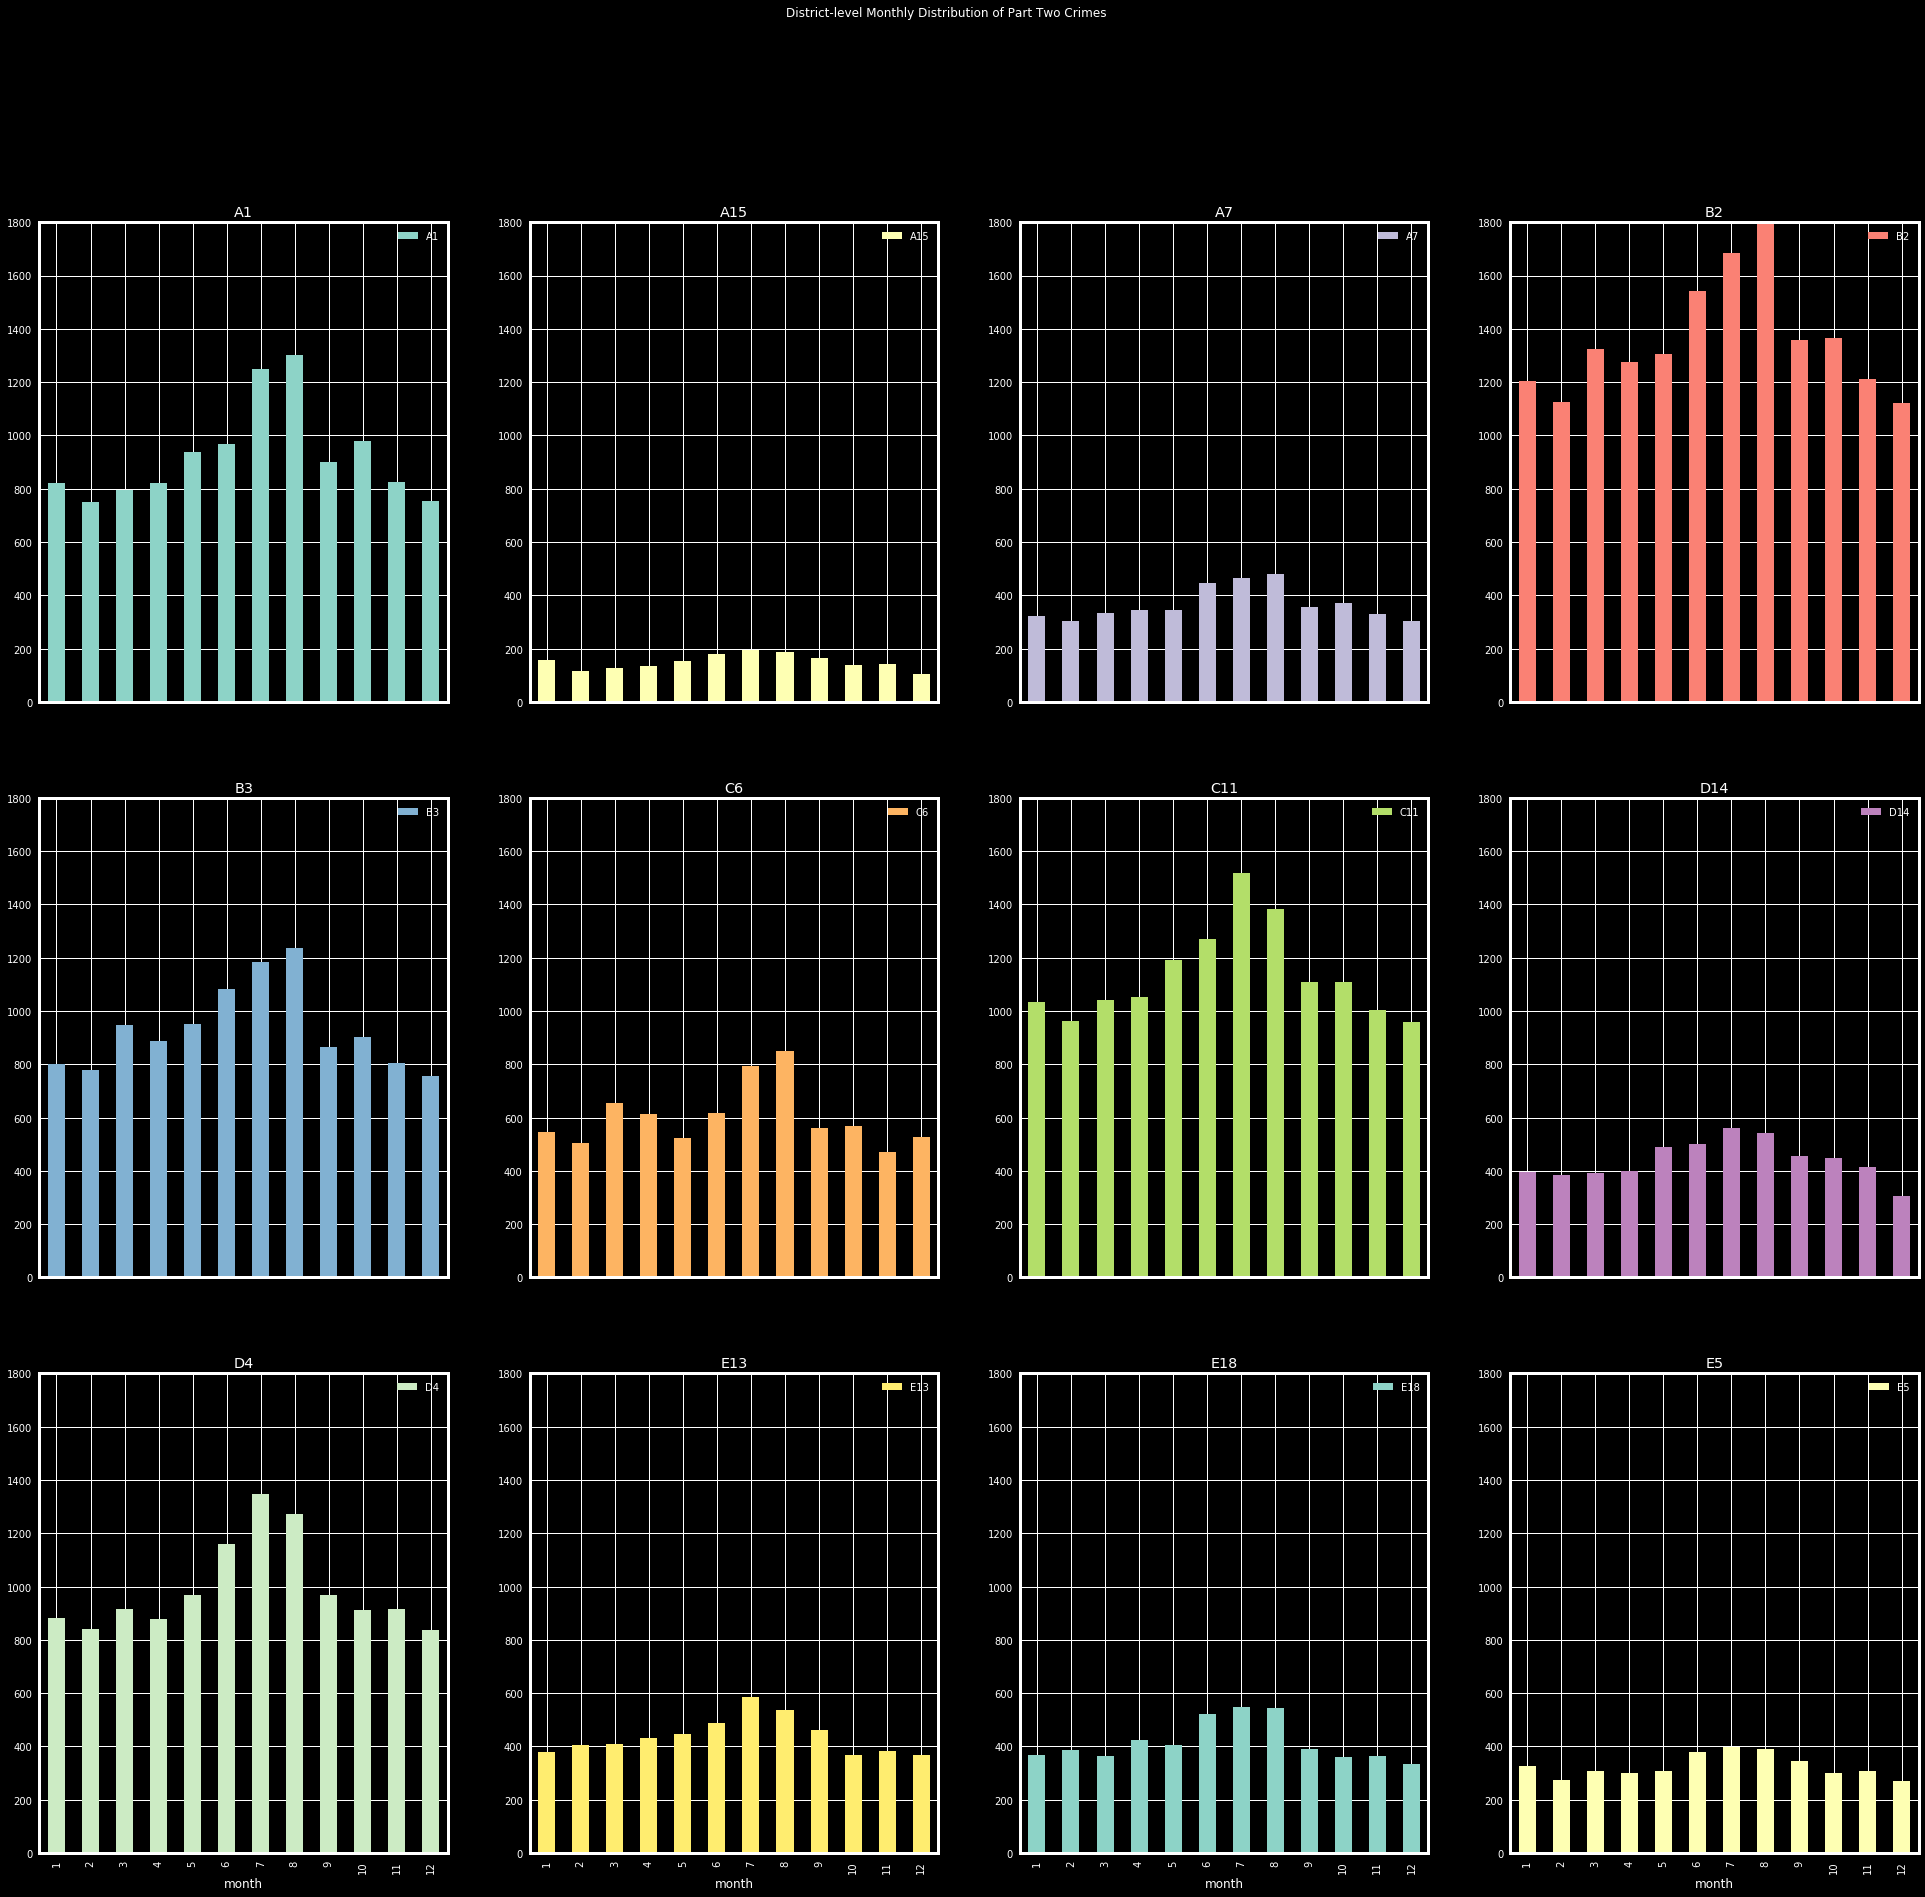

In [9]:
parttwo_districts.plot.bar(subplots=True,
                           layout=(3,4), 
                           figsize = (30,30), 
                           ylim=(0,1800),
                           title = 'District-level Monthly Distribution of Part Two Crimes')
plt.show()

In [10]:
# Part 3 monthly crime count

partthree_D14 = pd.DataFrame(partthree[partthree.district=='D14'].groupby('month').count()['ucr_part'])
partthree_C11 = pd.DataFrame(partthree[partthree.district=='C11'].groupby('month').count()['ucr_part'])
partthree_D4 = pd.DataFrame(partthree[partthree.district=='D4'].groupby('month').count()['ucr_part'])
partthree_B3 = pd.DataFrame(partthree[partthree.district=='B3'].groupby('month').count()['ucr_part'])
partthree_B2 = pd.DataFrame(partthree[partthree.district=='B2'].groupby('month').count()['ucr_part'])
partthree_C6 = pd.DataFrame(partthree[partthree.district=='C6'].groupby('month').count()['ucr_part'])
partthree_A1 = pd.DataFrame(partthree[partthree.district=='A1'].groupby('month').count()['ucr_part'])
partthree_E5 = pd.DataFrame(partthree[partthree.district=='E5'].groupby('month').count()['ucr_part'])
partthree_A7 = pd.DataFrame(partthree[partthree.district=='A7'].groupby('month').count()['ucr_part'])
partthree_E13 = pd.DataFrame(partthree[partthree.district=='E13'].groupby('month').count()['ucr_part'])
partthree_E18 = pd.DataFrame(partthree[partthree.district=='E18'].groupby('month').count()['ucr_part'])
partthree_A15 = pd.DataFrame(partthree[partthree.district=='A15'].groupby('month').count()['ucr_part'])

frames = [partthree_A1, partthree_A15, partthree_A7, partthree_B2, partthree_B3, partthree_C6, 
          partthree_C11, partthree_D14, partthree_D4, partthree_E13, partthree_E18, partthree_E5]

partthree_districts = pd.concat(frames,axis=1)
partthree_districts.columns=['A1','A15','A7','B2','B3','C6','C11','D14','D4','E13','E18','E5']
partthree_districts

,A1,A15,A7,B2,B3,C6,C11,D14,D4,E13,E18,E5
month,,,,,,,,,,,,
1,1089,233,549,1897,1516,878,1650,752,1150,639,755,560
2,1079,256,497,1660,1300,779,1539,727,1208,597,712,527
3,1252,272,499,2010,1413,935,1698,811,1349,673,766,644
4,1220,261,561,1982,1446,881,1648,741,1375,695,683,554
5,1290,302,574,2034,1623,926,1850,947,1476,760,859,613
6,1477,359,673,2388,1772,1110,2023,1027,1735,834,972,702
7,1760,343,661,2525,2013,1233,2317,1168,1836,880,991,769
8,1847,377,731,2497,2130,1193,2381,1165,1854,915,1020,799
9,1343,259,532,2017,1535,990,1858,970,1474,672,719,579


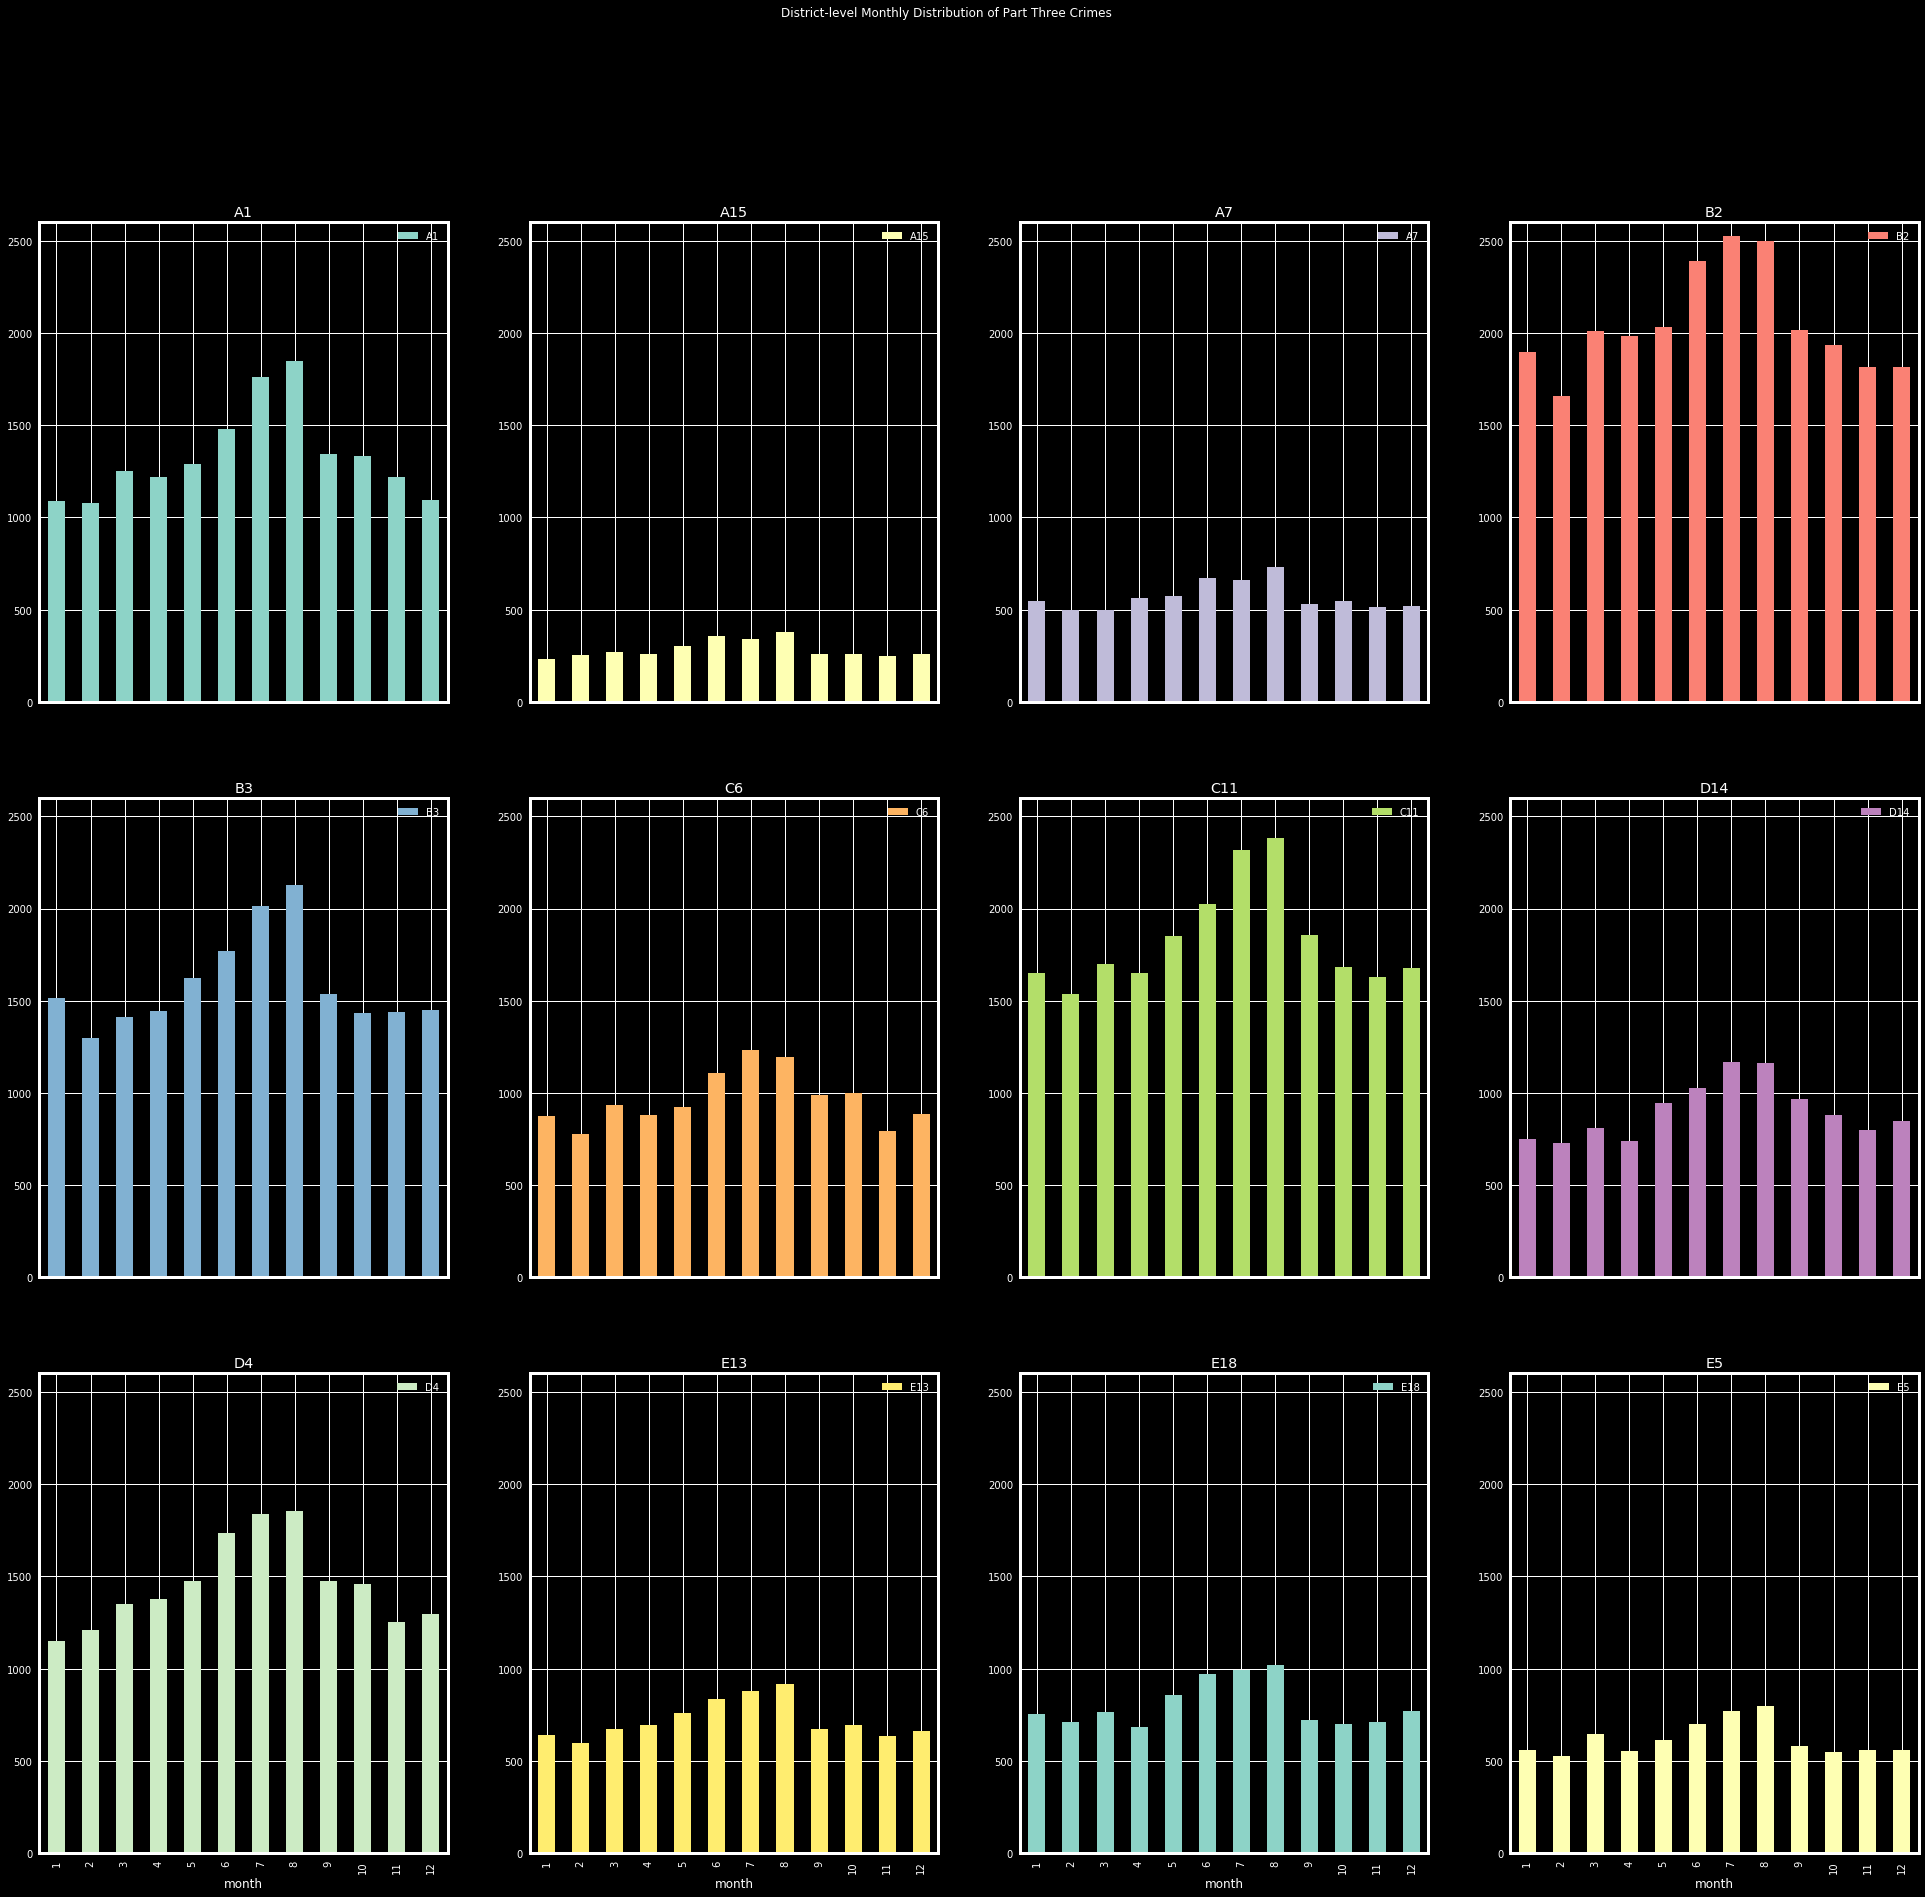

In [11]:
partthree_districts.plot.bar(subplots=True,
                           layout=(3,4), 
                           figsize = (30,30), 
                           ylim=(0,2600),
                           title = 'District-level Monthly Distribution of Part Three Crimes')
plt.show()

In [12]:
from ipywidgets import *

In [13]:
slider = IntSlider(value=50)
slider

IntSlider(value=50)

In [14]:
slider.value = 100

In [15]:
text = HTML("The slider's value is <b>{}</b>".format(slider.value))
text

HTML(value="The slider's value is <b>100</b>")

In [16]:
def update_html(change): 
    text.value = "The slider's value is <b>{}</b>".format(slider.value)
    
slider.observe(update_html, 'value')

## Geospatial visualization

In [39]:
from ipyleaflet import Map, Marker, MarkerCluster, CircleMarker, FullScreenControl, LayersControl

In [83]:
m = Map(center = (42.361145,-71.057083),zoom=10,basemap=basemaps.CartoDB.DarkMatter)
m.add_control(FullScreenControl())
m.add_control(LayersControl())

In [54]:
A1_one = partone[partone['district']=='A1']
#A1_one
partone

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,year,month,day_of_week,hour,ucr_part,street,lat,long,location
occurred_on_date,,,,,,,,,,,,,,,,
2018-09-02 13:00:00,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
2018-09-03 21:25:00,I182070933,724,Auto Theft,AUTO THEFT,B2,330,NaN,2018,9,Monday,21,Part One,NORMANDY ST,42.306072,-71.082733,"(42.30607218, -71.08273260)"
2018-09-03 20:48:00,I182070931,301,Robbery,ROBBERY - STREET,C6,177,NaN,2018,9,Monday,20,Part One,MASSACHUSETTS AVE,42.331521,-71.070853,"(42.33152148, -71.07085307)"
2018-09-02 18:00:00,I182070915,614,Larceny From Motor Vehicle,LARCENY THEFT FROM MV - NON-ACCESSORY,B2,181,NaN,2018,9,Sunday,18,Part One,SHIRLEY ST,42.325695,-71.068168,"(42.32569490, -71.06816778)"
2018-09-03 18:38:00,I182070908,522,Residential Burglary,BURGLARY - RESIDENTIAL - NO FORCE,B2,911,NaN,2018,9,Monday,18,Part One,ANNUNCIATION RD,42.335062,-71.093168,"(42.33506218, -71.09316781)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-07-29 00:00:00,I110261417-00,619,Larceny,LARCENY OTHER $200 & OVER,B2,324,NaN,2016,7,Friday,0,Part One,BOWDOIN ST,42.307038,-71.066153,"(42.30703835, -71.06615319)"
2016-06-05 17:23:00,I100636670-00,629,Larceny,LARCENY OTHER $50 TO $199,D4,285,NaN,2016,6,Sunday,17,Part One,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
2015-07-27 10:47:00,I100340225-00,339,Robbery,ROBBERY - UNARMED - STREET,A1,77,NaN,2015,7,Monday,10,Part One,BOWDOIN SQ,42.361645,-71.062299,"(42.36164502, -71.06229949)"


In [63]:
districts

array(['D14', 'C11', 'D4', 'B3', 'B2', 'C6', nan, 'A1', 'E5', 'A7', 'E13',
       'E18', 'A15'], dtype=object)

In [84]:
partone_sample = partone[:1000]

# plot airport locations
for (index, row) in partone_sample.iterrows():
    marker = CircleMarker(location=[row.loc['lat'], row.loc['long']])
    marker.radius = 1
    if row.loc['district'] == 'A1':
        marker.color = "#AFEEEE"
        marker.fill_color = "#AFEEEE"
    elif row.loc['district'] == 'A7':
        marker.color = "#E6E6FA"
        marker.fill_color = "#E6E6FA"
    elif row.loc['district'] == 'A15':
        marker.color = "#FAFAD2"
        marker.fill_color = "#FAFAD2"
    elif row.loc['district'] == 'B3':
        marker.color = "#87CEEB"
        marker.fill_color = "#87CEEB"
    elif row.loc['district'] == 'B2':
        marker.color = "#FF6347"
        marker.fill_color = "#FF6347"
    elif row.loc['district'] == 'C6':
        marker.color = "#FFA500"
        marker.fill_color = "#FFA500"
    elif row.loc['district'] == 'C11':
        marker.color = "#90EE90"
        marker.fill_color = "#90EE90"
    elif row.loc['district'] == 'D4':
        marker.color = "#7FFFD4"
        marker.fill_color = "#7FFFD4"
    elif row.loc['district'] == 'D14':
        marker.color = "#DDA0DD"
        marker.fill_color = "#DDA0DD"
    elif row.loc['district'] == 'E5':
        marker.color = "#FFFACD"
        marker.fill_color = "#FFFACD"
    elif row.loc['district'] == 'E13':
        marker.color = "#EEE8AA"
        marker.fill_color = "#EEE8AA"
    elif row.loc['district'] == 'E18':
        marker.color = "#B0E0E6"
        marker.fill_color = "#B0E0E6"
    else:
        marker.color = "black"
        marker.fill_color = "black"
    m.add_layer(marker)

# display map    
m

Map(basemap={'url': 'http://c.basemaps.cartocdn.com/dark_all/{z}/{x}/{y}.png', 'max_zoom': 20, 'attribution': …

In [70]:
import pandas as pd
import ipywidgets

# load data as dataframe
A1_one_slider = A1_one[['occured_on_date', 'lat', 'long']]
A1_one_slider_sample = A1_one_slider.head(50)

# create ipywidgets slider
selection_slider = ipywidgets.SelectionSlider(options=list(A1_one_slider['occured_on_date']),
                                              value='01/01/2015',
                                              description='Slider',
                                              disabled=False,
                                              continuous_update=False,
                                              orientation='horizontal',
                                              readout=True)

# display map
m

# plot earthquake locations using widget
def plot_a1_crimes(date):
    c = A1_one_slider.loc[A1_one_slider['occured_on_date'] == date]
    for (index, row) in c.iterrows():
        marker = Marker(location=[row.loc['lat'], row.loc['long']])
        m.add_layer(marker)
    print(A1_one_slider.loc[A1_one_slider['occured_on_date'] == date])
        
ipywidgets.interact(plot_a1_crimes, date=selection_slider)

KeyError: "['occured_on_date'] not in index"

In [71]:
import geocoder
import ipyleaflet
from ipyleaflet import Map, WidgetControl
import ipywidgets

# get location data for large cities (latitude and longitude)
new_york_city = geocoder.osm('New York City, New York')
los_angeles = geocoder.osm('Los Angeles, California')
chicago = geocoder.osm('Chicago, Illinois')
houston = geocoder.osm('Houston, Texas')
phoenix = geocoder.osm('Phoenix, Arizona')
philadelphia = geocoder.osm('Philadelphia, Pennsylvania')
san_antonio = geocoder.osm('San Antonio, Texas')
san_diego = geocoder.osm('San Diego, California')
dallas = geocoder.osm('Dallas, Texas')
san_jose = geocoder.osm('San Jose, California')

# create latitude, longitude, intensity for heat map
# intensity is population scaled down so heat dots are more readable
new_york_city_latlng = [new_york_city.lat, new_york_city.lng, 8398748/1000]
los_angeles_latlng = [los_angeles.lat, los_angeles.lng, 3990456/1000]
chicago_latlng = [chicago.lat, chicago.lng, 2705994/1000]
houston_latlng = [houston.lat, houston.lng, 2325502/1000]
phoenix_latlng = [phoenix.lat, phoenix.lng, 1660272/1000]
philadelphia_latlng = [philadelphia.lat, philadelphia.lng, 1584138/1000]
san_antonio_latlng = [san_antonio.lat, san_antonio.lng, 1532233/1000]
san_diego_latlng = [san_diego.lat, san_diego.lng, 1425976/1000]
dallas_latlng = [dallas.lat, dallas.lng, 1345047/1000]
san_jose_latlng = [san_jose.lat, san_jose.lng, 1030119/1000]

# create list of cities with latitude, longitude, intensity
large_cities = [new_york_city_latlng, los_angeles_latlng, chicago_latlng, houston_latlng, phoenix_latlng, 
                philadelphia_latlng, san_antonio_latlng, san_diego_latlng, dallas_latlng, san_jose_latlng]

# slider widget to control heatmap radius
radius_slider = ipywidgets.IntSlider(value=10,
                                  min=1,
                                  max=50,
                                  step=1,
                                  description='Radius:',
                                  disabled=False,
                                  continuous_update=False,
                                  orientation='horizontal',
                                  readout=True,
                                  readout_format='d')

def resize_radius(radius_size):
    # create map
    cities_heatmap = Map(center=(40, -99), zoom=4)
    
    # create heatmap layer
    heatmap_layer = ipyleaflet.Heatmap(locations=large_cities, radius=radius_size, blur=20)
    
    # add heatmap layer to map
    cities_heatmap.add_layer(heatmap_layer)
    
    # display map
    display(cities_heatmap)
    
ipywidgets.interact(resize_radius, radius_size=radius_slider)

INFO:geocoder.base:Requested https://nominatim.openstreetmap.org/search?q=New+York+City%2C+New+York&format=jsonv2&addressdetails=1&limit=1
INFO:geocoder.base:Requested https://nominatim.openstreetmap.org/search?q=Los+Angeles%2C+California&format=jsonv2&addressdetails=1&limit=1
INFO:geocoder.base:Requested https://nominatim.openstreetmap.org/search?q=Chicago%2C+Illinois&format=jsonv2&addressdetails=1&limit=1
INFO:geocoder.base:Requested https://nominatim.openstreetmap.org/search?q=Houston%2C+Texas&format=jsonv2&addressdetails=1&limit=1
INFO:geocoder.base:Requested https://nominatim.openstreetmap.org/search?q=Phoenix%2C+Arizona&format=jsonv2&addressdetails=1&limit=1
INFO:geocoder.base:Requested https://nominatim.openstreetmap.org/search?q=Philadelphia%2C+Pennsylvania&format=jsonv2&addressdetails=1&limit=1
INFO:geocoder.base:Requested https://nominatim.openstreetmap.org/search?q=San+Antonio%2C+Texas&format=jsonv2&addressdetails=1&limit=1
INFO:geocoder.base:Requested https://nominatim.open

interactive(children=(IntSlider(value=10, continuous_update=False, description='Radius:', max=50, min=1), Outp…

<function __main__.resize_radius(radius_size)>